In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pathlib
import os
import random
import pickle


import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def para_load(num):
    folder_path = pathlib.Path("{}_view_mat".format(dataset_name))
    file_path = os.path.join(folder_path, str(num)+".csv")
    
    Rt = np.loadtxt(file_path, delimiter=",")
    Rt = np.linalg.inv(Rt)
    cam_world_cood = -np.dot(Rt[0:3,0:3].T, Rt[0:3,3])
    return cam_world_cood

In [47]:
dataset_name = "exp2021_005_GmJMC112_01_MVI_01"

In [48]:
with open("{}_id.pickle".format(dataset_name), 'rb') as f:
    ids = pickle.load(f)

new_ids = []
slected = []
for _id in ids:
    column = int(_id[1].split("_")[1])
    if column%2:
        new_ids.append(_id)
        slected.append(_id[0])
slected = np.array(slected)
print(len(new_ids))

127


In [49]:
np.save('{}_camera_select'.format(dataset_name), slected)

In [50]:
x_list, y_list, z_list = [],[],[]

for new_id in new_ids:
    co = para_load(new_id[0])
    x_list.append(co[0])
    y_list.append(co[1])
    z_list.append(co[2])

<IPython.core.display.Javascript object>


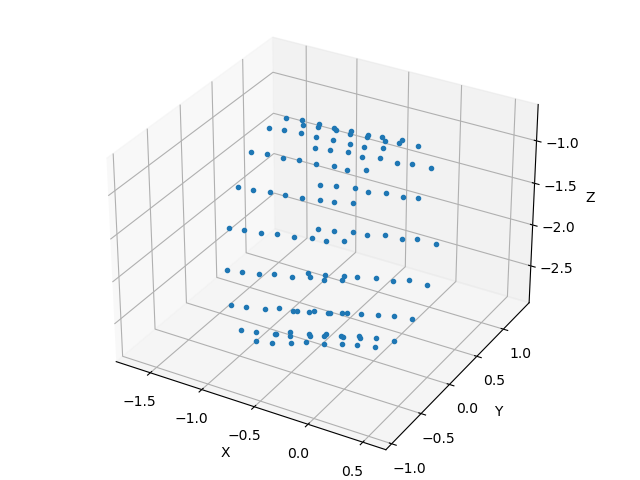

C:\Users\murata\anaconda3\envs\py37cv\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


In [51]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.plot(x_list,y_list,z_list,marker=".",linestyle='None')

plt.show()